In [9]:
from obspy.clients.fdsn import Client
client = Client("KNMI")

bh_stns = (3,4)
inventory_dict = {}

for b in bh_stns:
    sb = str(b)
    gstats_str = 'G0*'+sb+',G1*'+sb+',G2*'+sb+',G3*'+sb+',G4*'+sb+',G5*'+sb+',G6*'+sb+',G70*'+sb
    inventory_dict[b] = client.get_stations(network="NL", station=gstats_str , level="response")

print('Inventory_Dict.keys():', inventory_dict.keys())
print()
#print('inventory_dict[3]:', inventory_dict[3])

#network = inventory_dict[4][0]
#for station in network:
    #print('Station Code:',station.code)
    
test_dict = {}
x = 3.14
test_dict['X'] = x
print(test_dict)
x = 13.0
test_dict['X'] = x
print(test_dict)


Inventory_Dict.keys(): dict_keys([3, 4])

{'X': 3.14}
{'X': 13.0}


In [5]:
import numpy as np
import pandas as pd

# read file
df = pd.io.parsers.read_csv("Gloc.csv",sep=",",index_col=0)
print(df)
print()
print('Slice for QC of G04#')
print(df[15:20])
print()
print('Slice for QC of G05#')
print(df[20:25])
print()
print('Slice for QC of G07#')
print(df[30:35])
print()
print('Slice for QC of G10#')
print(df[45:50])

# remove Lat and Lon and surf elevation
df = df.drop(columns=['Latitude [deg]', 'Longitude [deg]', 'Surface elevation [m]'])
print('Dropped Lat, Lon, Surf')
print(df)
print()

# remove receivers unless depth is 200 meters
df = df[df['Depth below surface [deg]'] != 0 ]
print('Remove 0')
print(df)
print()

# remove receivers unless depth is 200 meters
df = df[df['Depth below surface [deg]'] != 50 ]
print('Remove 50')
print(df)
print()

# remove receivers unless depth is 200 meters
df = df[df['Depth below surface [deg]'] != 100 ]
print('Remove 100')
print(df)
print()

# remove receivers unless depth is 200 meters
df = df[df['Depth below surface [deg]'] != 150 ]
print('Remove 150')
print(df)
print()

# remove receivers unless depth is 200 meters
df = df[df['Depth below surface [deg]'] != 200 ]
print('Remove 200')
print(df)
print()

# drop this column
df = df.drop(columns=['Depth below surface [deg]'])
print('Dropped Depth')
print(df[:10])
print()

#get rec_x
rec_x = df[['Rijksdriehoek X [m]']].to_numpy().astype(np.float32)
#reshape to vector of only one dim
rec_x = rec_x.reshape(rec_x.shape[0])
print()

#get rec_y
rec_y = df[['Rijksdriehoek Y [m]']].to_numpy().astype(np.float32)
#reshape to vector of only one dim
rec_y = rec_y.reshape(rec_y.shape[0])
print()

              Latitude [deg]  Longitude [deg]  Rijksdriehoek X [m]  \
Station name                                                         
G010                53.44253         6.731191             244304.6   
G011                53.44253         6.731191             244304.6   
G012                53.44253         6.731191             244304.6   
G013                53.44253         6.731191             244304.6   
G014                53.44253         6.731191             244304.6   
...                      ...              ...                  ...   
G760                53.35072         6.390067             221781.6   
G770                53.34029         6.330437             217826.2   
G780                53.36482         6.489397             228371.6   
G790                53.38356         6.331927             217862.1   
G800                53.41537         6.487625             228167.6   

              Rijksdriehoek Y [m]  Depth below surface [deg]  \
Station name             

['NL', 'G203', 'FXZ', 'semd']
['NL', 'G064', 'FXZ', 'semd']
['NL', 'G124', 'FXZ', 'semd']
['NL', 'G343', 'FXZ', 'semd']
['NL', 'G684', 'FXZ', 'semd']
['NL', 'G334', 'FXZ', 'semd']
['NL', 'G494', 'FXZ', 'semd']
['NL', 'G274', 'FXZ', 'semd']
['NL', 'G013', 'FXZ', 'semd']
['NL', 'G393', 'FXZ', 'semd']
['NL', 'G433', 'FXZ', 'semd']
['NL', 'G654', 'FXZ', 'semd']
['NL', 'G183', 'FXZ', 'semd']
['NL', 'G444', 'FXZ', 'semd']
['NL', 'G623', 'FXZ', 'semd']
['NL', 'G504', 'FXZ', 'semd']
['NL', 'G693', 'FXZ', 'semd']
['NL', 'G354', 'FXZ', 'semd']
['NL', 'G214', 'FXZ', 'semd']
['NL', 'G073', 'FXZ', 'semd']
['NL', 'G263', 'FXZ', 'semd']
['NL', 'G483', 'FXZ', 'semd']
['NL', 'G144', 'FXZ', 'semd']
['NL', 'G323', 'FXZ', 'semd']
['NL', 'G424', 'FXZ', 'semd']
['NL', 'G643', 'FXZ', 'semd']
['NL', 'G564', 'FXZ', 'semd']
['NL', 'G513', 'FXZ', 'semd']
['NL', 'G453', 'FXZ', 'semd']
['NL', 'G634', 'FXZ', 'semd']
['NL', 'G194', 'FXZ', 'semd']
['NL', 'G353', 'FXZ', 'semd']
['NL', 'G694', 'FXZ', 'semd']
['NL', 'G2

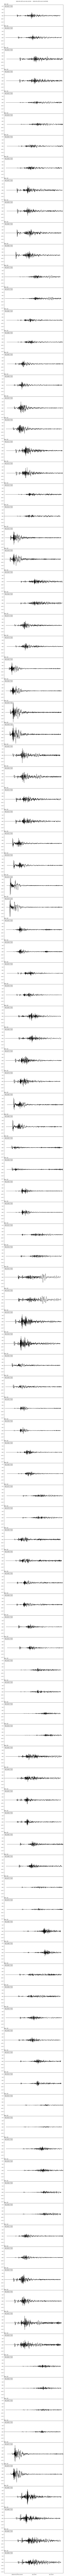

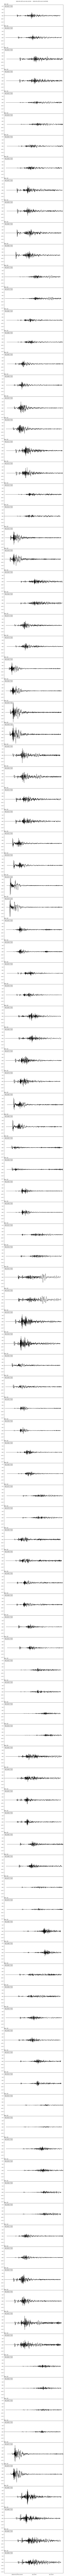

In [42]:
import obspy
from obspy import Stream
from obspy import Trace
from obspy import UTCDateTime
import fnmatch
import os
import numpy as np
import pandas as pd

fdir = 'semd_data'
file_list = []
for file in os.listdir(fdir):
    if fnmatch.fnmatch(file, '*semd'):
        print(file.split('.'))
        file_list.append(file)

print(file_list)

# read file
#df = pd.io.parsers.read_csv('./semd_data/NL.FF439.FXZ.semd',sep="\s+",header=None, usecols=[1])
#sdata = df.to_numpy().astype(np.float32).flatten()
#print(sdata)

st = Stream()
for f in file_list:
    fqn = fdir + '/' + f
    df = pd.io.parsers.read_csv(fqn,sep="\s+",header=None, usecols=[1])
    data = df.to_numpy().astype(np.float32).flatten()
    fhdr = f.split('.')
    # Fill header attributes
    stats = {'network': fhdr[0], 'station': fhdr[1], 'location': '',
             'channel': fhdr[2], 'npts': len(data), 'delta': 0.001}
    # set current time
    stats['starttime'] = UTCDateTime()
    st += Stream([Trace(data=data, header=stats)])

st.filter('bandpass',freqmin=1.0,freqmax=18.0,corners=4)
st.plot()
    
